In [2]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('insurance.csv')

## EDA


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

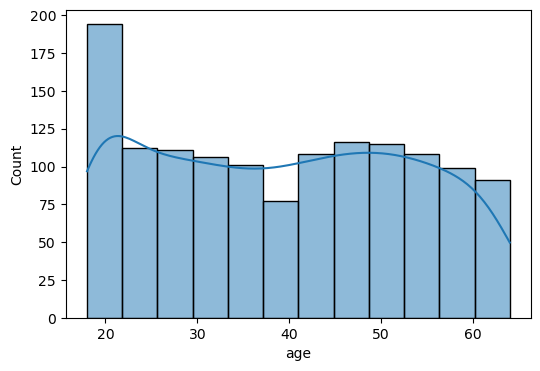

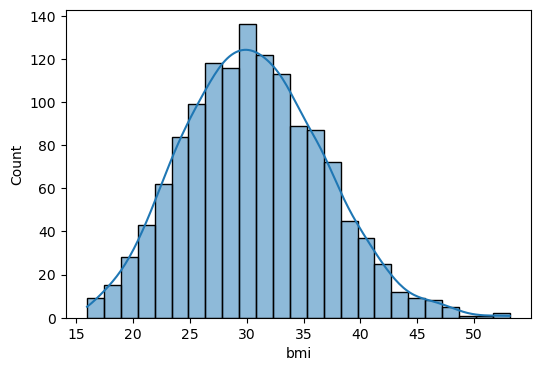

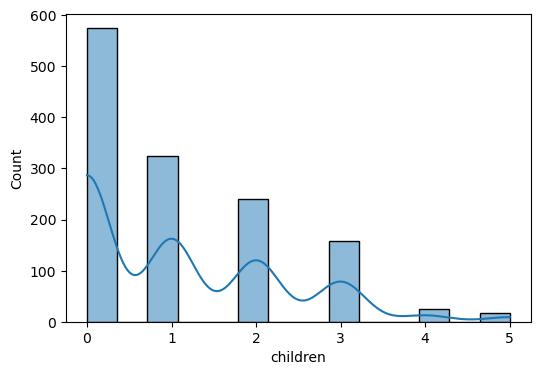

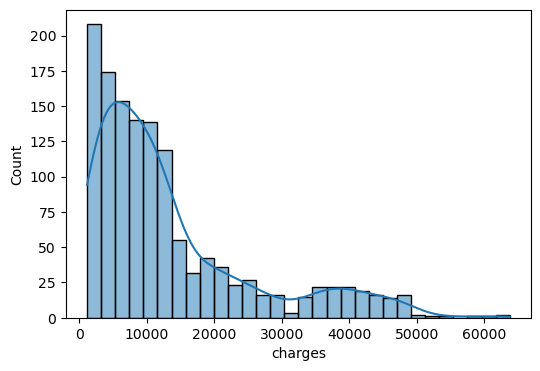

In [10]:
numeric_cols=['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)

<Axes: xlabel='children', ylabel='count'>

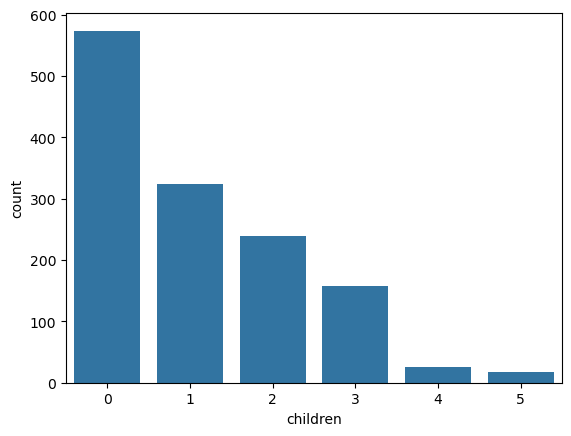

In [11]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

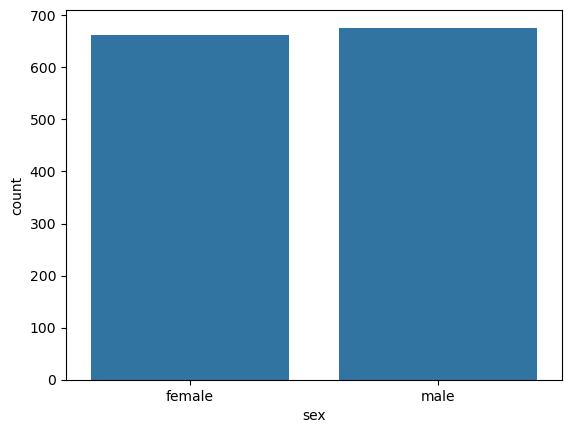

In [12]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

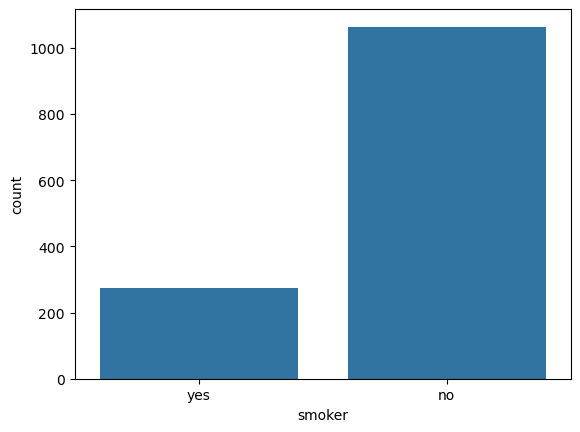

In [13]:
sns.countplot(x=df['smoker'])

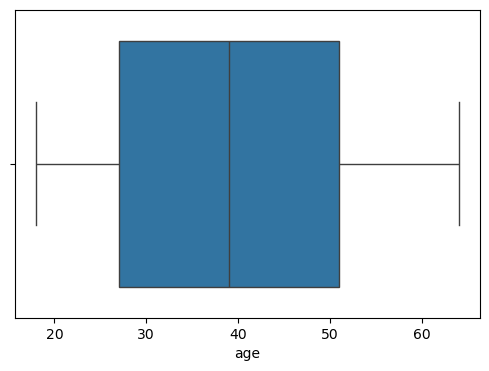

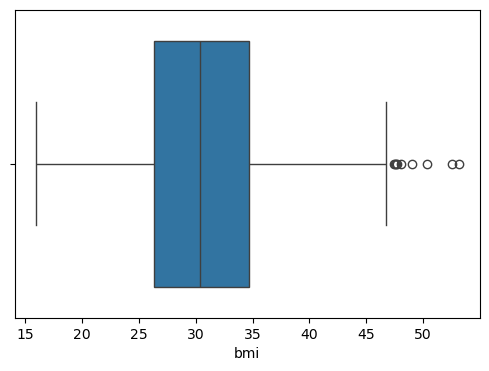

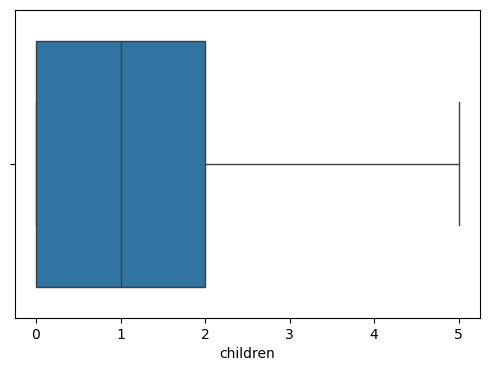

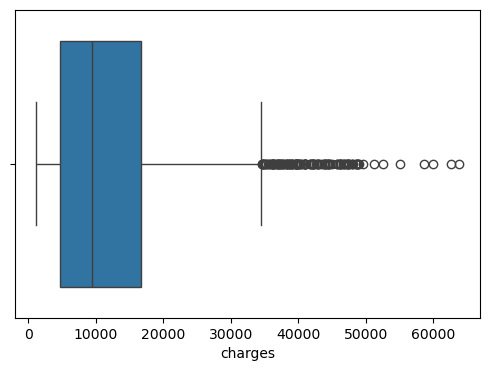

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

<Axes: >

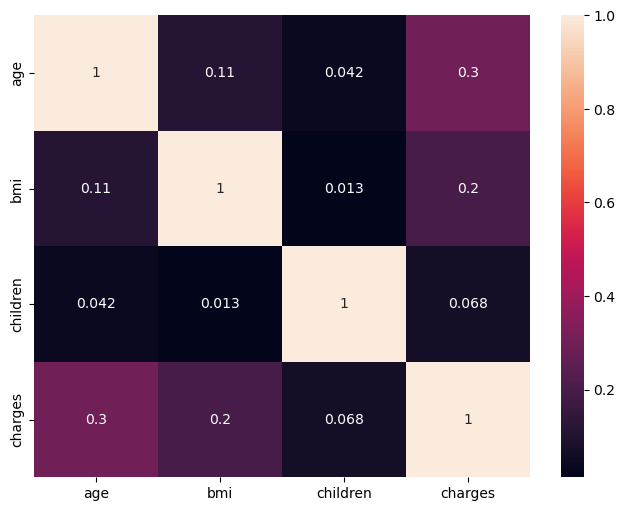

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing

as i already cleaned this data in excel , moving forward to next steps 

In [16]:
df_cleaned=df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_cleaned.shape

(1338, 7)

In [19]:
df_cleaned.drop_duplicates(inplace=True)

In [20]:
df_cleaned.shape

(1337, 7)

In [21]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [24]:
df_cleaned['sex'].count()

1337

In [25]:
df_cleaned['sex']=df_cleaned['sex'].map({'male' : 0, 'female' : 1})

In [26]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [27]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [28]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1, 'no':0})

In [29]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [30]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
}, inplace=True)

In [31]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [32]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [33]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'])

In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [35]:
df_cleaned=df_cleaned.astype(int)

In [36]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


#### Feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

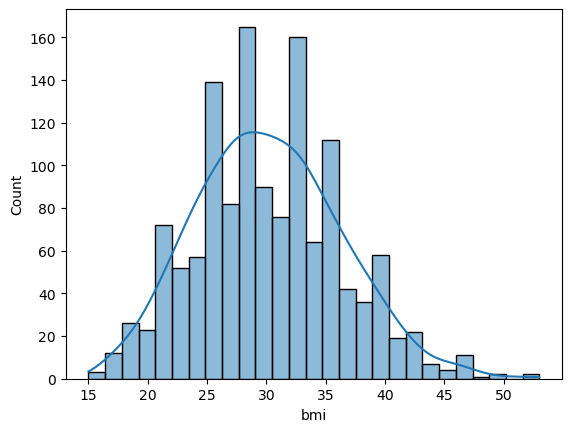

In [37]:
sns.histplot(df_cleaned['bmi'],kde=True)

In [38]:
df_cleaned.shape

(1337, 10)

In [39]:
df_cleaned['bmi_categories']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']

)

In [40]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [41]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_categories'])

In [42]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,1,27,0,1,16884,0,0,0,1,False,False,True,False
1,18,0,33,1,0,1725,0,0,1,0,False,False,False,True
2,28,0,33,3,0,4449,0,0,1,0,False,False,False,True
3,33,0,22,0,0,21984,0,1,0,0,False,True,False,False
4,32,0,28,0,0,3866,0,1,0,0,False,False,True,False


In [43]:
df_cleaned=df_cleaned.astype(int)

In [44]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


###### feature scaling

In [45]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_categories_Underweight',
       'bmi_categories_Normal', 'bmi_categories_Overweight',
       'bmi_categories_Obese'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler

cols=['age','bmi','children']

scaler= StandardScaler()

df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [47]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_categories_Underweight,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


### Feature Extraction

In [48]:
## Using pearson correlation to check relation between various features and charges

from scipy.stats import pearsonr

selected_features=['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_categories_Underweight',
       'bmi_categories_Normal', 'bmi_categories_Overweight',
       'bmi_categories_Obese']

correlations= { 
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]

    for feature in selected_features

}

In [49]:
correlation_df = pd.DataFrame(list(correlations.items()),columns=['features','pearson_corr'])

In [50]:
correlation_df.sort_values(by='pearson_corr',ascending=False)

,features,pearson_corr
4,is_smoker,0.787234
0,age,0.298309
12,bmi_categories_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
9,bmi_categories_Underweight,-0.050599


In [51]:
cat_features = [
    'is_female', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_categories_Underweight',
       'bmi_categories_Normal', 'bmi_categories_Overweight',
       'bmi_categories_Obese']



In [52]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha=0.05
df_cleaned['charges_bins']=pd.qcut(df_cleaned['charges'],q=4,labels=False)
chi2_results={}

for col in cat_features:
    contigency = pd.crosstab(df_cleaned[col],df_cleaned['charges_bins'])
    chi2_stat,p_val,_,_ = chi2_contingency(contigency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col]={
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

In [53]:
chi2_df= pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by='p_value')

In [54]:
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_categories_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_northeast,6.438442,0.092122,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_categories_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_categories_Normal,3.708088,0.29476,Accept Null (Drop Feature)
bmi_categories_Underweight,3.37403,0.337471,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [55]:
final_df= df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker','charges',
       'region_southeast','region_southwest','bmi_categories_Underweight']]

In [56]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,region_southwest,bmi_categories_Underweight
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,0,0
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,1,0


### Model creation,train,test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=final_df.drop('charges',axis=1)
y=final_df['charges']

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred=model.predict(X_test)

In [62]:
## for performance evaluation calculate r2_score (R square)

from sklearn.metrics import r2_score

r2= r2_score(y_test,y_pred)

In [63]:
r2

0.8076453369972725

In [64]:
## calculating adjusted r2 score to check for overfiting

n=X_test.shape[0]

p=X_test.shape[1]

adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [65]:
adj_r2

0.8017038802249875

In [66]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

      Actual     Predicted
900     8688   7922.973263
1064    5708   5655.184472
1256   11436  14604.256442
298    38746  31980.228152
237     4463   8980.628846
481     9304  13141.425212
240    38511  30203.288357
277     2150   1469.380949
415     7345  10580.394446
707    10264  11437.922438


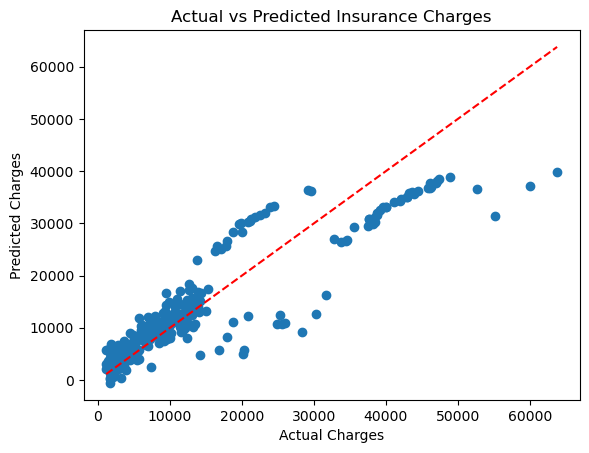

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()
